In [ ]:
# so inthis exercise the user will be giving teh name ans a list and the operation based on the operation we should perform the operation on the list of elements

In [ ]:
!pip install IPython
!pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 10.0 MB/s eta 0:00:00


In [ ]:
from typing import TypedDict, List
from langgraph.graph import StateGraph
import math

In [ ]:
class AgentState(TypedDict):
  values: List[int]
  name: str
  operation: str
  result: str

In [ ]:
def perform_operation(state: AgentState) -> AgentState:
  """ here the function performs as it takes the operatiuon and perform s the speciffic operation on the list values it ony performs the addition and multiplication """
  if state['operation'] == "+":
    res = sum(state['values'])
    state['result'] = f"heyyy {state['name']}, you have selected the operation {state['operation']}, and the final result is {res}"
  elif state['operation'] == "*":
    res = math.prod(state['values'])
    state['result'] = f"heyyy {state['name']}, you have selected the operation {state['operation']}, and the final result is {res}"
  else:
    state['result'] = 'select a correct operation.Only  +, * are operable select in these two only'
  return state

In [ ]:
graph = StateGraph(AgentState)

graph.add_node("operations_result", perform_operation)
graph.set_entry_point("operations_result")
graph.set_finish_point("operations_result")

app = graph.compile()

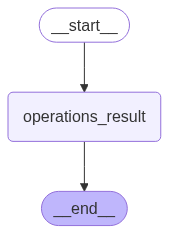

In [ ]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
results = app.invoke({'values': [1,2,3,4,5], 'name': 'sai', 'operation': '+'})
results


{'values': [1, 2, 3, 4, 5],
 'name': 'sai',
 'operation': '+',
 'result': 'heyyy sai, you have selected the operation +, and the final result is 15'}

In [ ]:
results['result']

'heyyy sai, you have selected the operation +, and the final result is 15'

In [ ]:
results = app.invoke({'values': [1,2,3,4,5], 'name': 'sai', 'operation': '*'})
results

{'values': [1, 2, 3, 4, 5],
 'name': 'sai',
 'operation': '*',
 'result': 'heyyy sai, you have selected the operation *, and the final result is 120'}

In [ ]:
results['result']

'heyyy sai, you have selected the operation *, and the final result is 120'